In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Visualizing the data

__Author:__ Ji Won Park (@jiwoncpark)

__Created:__ 3/08/2021

__Last run:__ 3/08/2021

__Goals:__
We visualize the input graph 

__Before_running:__
Generate the dataset, e.g.
```bash
python n2j/generate_training_labels.py
```

In [5]:
from n2j.trainval_data.graphs.cosmodc2_graph import CosmoDC2Graph
# Features to compile
features = ['ra_true', 'dec_true']
features += ['ellipticity_1_true', 'ellipticity_2_true']
features += ['size_true']
features += ['mag_{:s}_lsst'.format(b) for b in 'ugrizY']
healpixes = [10450, 10327]
raytracing_out_dirs = ['../cosmodc2_raytracing_{:d}'.format(hp) for hp in healpixes]
dataset = CosmoDC2Graph(features=features,
                        raytracing_out_dirs=raytracing_out_dirs,
                        healpixes=healpixes,
                        n_data=[100, 100],
                        aperture_size=1.0,
                        stop_mean_std_early=True)

Processing...


100%|██████████| 100/100 [04:43<00:00,  2.83s/it]

Done!


torch.Size([134, 11]) torch.Size([2, 3588])


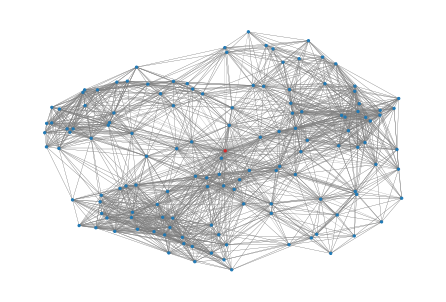

In [26]:
from torch_geometric.utils import to_networkx
import networkx as nx
sample_data = dataset[3]
sample_networkx = to_networkx(sample_data)
n_nodes = sample_data.x.shape[0]
node_color = ['#1f78b4']*n_nodes
node_color[0] = '#d62728'
nx.draw(sample_networkx, node_size=5, pos=dict(zip(range(n_nodes), sample_data.x[:, :2].tolist())),
        width=0.2, edge_color='tab:gray', arrowsize=1, alpha=1.0, node_color=node_color)

print(sample_data.x.shape, sample_data.edge_index.shape)
print(sample_data.y)